In [48]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.impute import SimpleImputer
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.linear_model import LogisticRegression
# import lightgbm as lgb
# import matplotlib.pyplot as plt
# # Charger le jeu de données

# df = pd.read_csv('dataset_test2.csv')

# # Sélectionner les variables indépendantes et la variable cible
# X = df.drop('MIS_Status', axis=1)
# y = df['MIS_Status']

# # Encoder la variable cible
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)

# # Identifier les variables catégorielles et numériques
# cat_vars = X.select_dtypes(include=['object']).columns.tolist() + ['NewExist'] + ['UrbanRural'] + ['FranchiseBinary'] 
# num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# num_vars.remove('NewExist')  
# num_vars.remove('UrbanRural') 
# num_vars.remove('FranchiseBinary') 
# # Créer les transformateurs pour les pipelines
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('encoder', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Combiner les transformateurs dans un ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, num_vars),
#         ('cat', categorical_transformer, cat_vars)
#     ])

# # Créer la pipeline de traitement et de modélisation
# rf_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     # ('dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
#     ('classifier', lgb.LGBMClassifier())
# ])

# # Séparer les données en ensembles d'entraînement et de test, stratifier sur y
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


# rf_pipeline.fit(X_train, y_train)

# # Prédire les étiquettes sur l'ensemble de test
# y_pred = rf_pipeline.predict(X_test)


# # Évaluer le modèle
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred, target_names=le.classes_)

# print(report)


[LightGBM] [Info] Number of positive: 437765, number of negative: 111204
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2318
[LightGBM] [Info] Number of data points in the train set: 548969, number of used features: 125
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.797431 -> initscore=1.370316
[LightGBM] [Info] Start training from score 1.370316
              precision    recall  f1-score   support

      CHGOFF       0.89      0.84      0.87     27801
       P I F       0.96      0.97      0.97    109442

    accuracy                           0.95    137243
   macro avg       0.93      0.91      0.92    137243
weighted avg       0.95      0.95      0.95    137243



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Charger le jeu de données

df = pd.read_csv('dataset_test2.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']



# Identifier les variables catégorielles et numériques
cat_vars = X.select_dtypes(include=['object']).columns.tolist()
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])



# Créer la pipeline de traitement et de modélisation
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    ('classifier', RandomForestClassifier())])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=0.05, random_state=42, stratify=y)



rf_pipeline.fit(X_train, y_train)

# # Prédire les étiquettes sur l'ensemble de test
y_pred = rf_pipeline.predict(X_test)


# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Rapport de classification:")
print(report)

Rapport de classification:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     27361
           1       0.91      0.79      0.85      6950

    accuracy                           0.94     34311
   macro avg       0.93      0.88      0.91     34311
weighted avg       0.94      0.94      0.94     34311



In [19]:
lgb.LGBMClassifier?

Init signature:
lgb.LGBMClassifier(
    boosting_type: str = 'gbdt',
    num_leaves: int = 31,
    max_depth: int = -1,
    learning_rate: float = 0.1,
    n_estimators: int = 100,
    subsample_for_bin: int = 200000,
    objective: Union[str, Callable[[Optional[numpy.ndarray], numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], Callable[[Optional[numpy.ndarray], numpy.ndarray, Optional[numpy.ndarray]], Tuple[numpy.ndarray, numpy.ndarray]], Callable[[Optional[numpy.ndarray], numpy.ndarray, Optional[numpy.ndarray], Optional[numpy.ndarray]], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = None,
    class_weight: Union[Dict, str, NoneType] = None,
    min_split_gain: float = 0.0,
    min_child_weight: float = 0.001,
    min_child_samples: int = 20,
    subsample: float = 1.0,
    subsample_freq: int = 0,
    colsample_bytree: float = 1.0,
    reg_alpha: float = 0.0,
    reg_lambda: float = 0.0,
    random_state: Union[int, numpy.random.mtrand.RandomState, ForwardRef('np.random.Generat

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from catboost import CatBoostClassifier

# Charger le jeu de données

df = pd.read_csv('dataset_test2.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']


# Identifier les variables catégorielles et numériques
cat_vars = X.select_dtypes(include=['object']).columns.tolist() + ['NewExist'] + ['UrbanRural'] + ['FranchiseBinary'] 
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars.remove('NewExist')  
num_vars.remove('UrbanRural') 
num_vars.remove('FranchiseBinary') 


# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
catboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    ('classifier', CatBoostClassifier(max_depth=10, one_hot_max_size=10))
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=0.05, random_state=42, stratify=y)

catboost_pipeline.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = catboost_pipeline.predict(X_test)

# param_grid = {
#     'num_leaves': [20, 30, 40],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'min_child_weight': [0.001, 0.05, 0.01]
# }
# # Créer une instance de GridSearchCV
# grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='accuracy')

# # Effectuer la recherche sur la grille
# grid_search.fit(X_train, y_train)

# # Meilleurs hyperparamètres trouvés
# best_params = grid_search.best_params_

# # Meilleur score obtenu sur l'ensemble d'entraînement
# best_score = grid_search.best_score_

# # Meilleur modèle
# best_model = grid_search.best_estimator_

# # Utiliser le meilleur modèle pour prédire les étiquettes sur l'ensemble de test
# y_pred = best_model.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# print("Meilleurs hyperparamètres:", best_params)
# print("Meilleur score sur l'ensemble d'entraînement:", best_score)
# print("Rapport de classification:")
print(report)

import pickle 
# Sauvegarde du modèle en fichier .pkl
with open('modele_cat.pkl', 'wb') as file:
    pickle.dump(catboost_pipeline, file)

Learning rate set to 0.163904
0:	learn: 0.5133029	total: 426ms	remaining: 7m 5s
1:	learn: 0.4105906	total: 782ms	remaining: 6m 30s
2:	learn: 0.3491371	total: 1.12s	remaining: 6m 12s
3:	learn: 0.3135733	total: 1.44s	remaining: 5m 59s
4:	learn: 0.2853640	total: 1.83s	remaining: 6m 4s
5:	learn: 0.2609983	total: 2.36s	remaining: 6m 30s
6:	learn: 0.2431547	total: 2.79s	remaining: 6m 36s
7:	learn: 0.2328906	total: 3.06s	remaining: 6m 18s
8:	learn: 0.2258380	total: 3.52s	remaining: 6m 27s
9:	learn: 0.2197624	total: 3.89s	remaining: 6m 24s
10:	learn: 0.2139795	total: 4.27s	remaining: 6m 24s
11:	learn: 0.2076103	total: 4.58s	remaining: 6m 17s
12:	learn: 0.2041205	total: 5s	remaining: 6m 19s
13:	learn: 0.2011688	total: 5.3s	remaining: 6m 13s
14:	learn: 0.1985291	total: 5.61s	remaining: 6m 8s
15:	learn: 0.1944664	total: 5.89s	remaining: 6m 1s
16:	learn: 0.1911155	total: 6.18s	remaining: 5m 57s
17:	learn: 0.1889843	total: 6.59s	remaining: 5m 59s
18:	learn: 0.1865982	total: 7.03s	remaining: 6m 3s
1

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# On crée la matrice de confusion en passant les classes et les prédictions du modèle, puis on l'affiche
y_train_pred_cat = cross_val_predict(catboost_pipeline, X_train, y_train)
y_train_pred_rf = cross_val_predict(rf_pipeline, X_train, y_train)
cm = confusion_matrix(y_train, y_train_pred_cat)
display(cm)



Learning rate set to 0.149008
0:	learn: 0.5258156	total: 99ms	remaining: 1m 38s
1:	learn: 0.4275702	total: 197ms	remaining: 1m 38s
2:	learn: 0.3595619	total: 299ms	remaining: 1m 39s
3:	learn: 0.3146526	total: 396ms	remaining: 1m 38s
4:	learn: 0.2914315	total: 485ms	remaining: 1m 36s
5:	learn: 0.2723684	total: 585ms	remaining: 1m 36s
6:	learn: 0.2555552	total: 687ms	remaining: 1m 37s
7:	learn: 0.2449120	total: 785ms	remaining: 1m 37s
8:	learn: 0.2367658	total: 877ms	remaining: 1m 36s
9:	learn: 0.2305051	total: 973ms	remaining: 1m 36s
10:	learn: 0.2236396	total: 1.06s	remaining: 1m 35s
11:	learn: 0.2149944	total: 1.15s	remaining: 1m 34s
12:	learn: 0.2106634	total: 1.24s	remaining: 1m 34s
13:	learn: 0.2070814	total: 1.34s	remaining: 1m 34s
14:	learn: 0.2032672	total: 1.44s	remaining: 1m 34s
15:	learn: 0.2011847	total: 1.56s	remaining: 1m 36s
16:	learn: 0.1985610	total: 1.66s	remaining: 1m 35s
17:	learn: 0.1964792	total: 1.75s	remaining: 1m 35s
18:	learn: 0.1915291	total: 1.85s	remaining: 

/home/utilisateur/Documents/Projets/Machine-learning/brief_classif_sba/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.149008
0:	learn: 0.5268607	total: 109ms	remaining: 1m 48s
1:	learn: 0.4269820	total: 221ms	remaining: 1m 50s
2:	learn: 0.3681616	total: 318ms	remaining: 1m 45s
3:	learn: 0.3268981	total: 417ms	remaining: 1m 43s
4:	learn: 0.3002497	total: 527ms	remaining: 1m 44s
5:	learn: 0.2817856	total: 623ms	remaining: 1m 43s
6:	learn: 0.2573488	total: 725ms	remaining: 1m 42s
7:	learn: 0.2462725	total: 814ms	remaining: 1m 40s
8:	learn: 0.2380101	total: 906ms	remaining: 1m 39s
9:	learn: 0.2280518	total: 1s	remaining: 1m 39s
10:	learn: 0.2231006	total: 1.1s	remaining: 1m 39s
11:	learn: 0.2143295	total: 1.2s	remaining: 1m 38s
12:	learn: 0.2105775	total: 1.29s	remaining: 1m 38s
13:	learn: 0.2044587	total: 1.39s	remaining: 1m 38s
14:	learn: 0.2017606	total: 1.49s	remaining: 1m 38s
15:	learn: 0.1984549	total: 1.59s	remaining: 1m 38s
16:	learn: 0.1960099	total: 1.7s	remaining: 1m 38s
17:	learn: 0.1939983	total: 1.79s	remaining: 1m 37s
18:	learn: 0.1920979	total: 1.89s	remaining: 1m 37

array([[116144,  15911],
       [ 12994, 506852]])

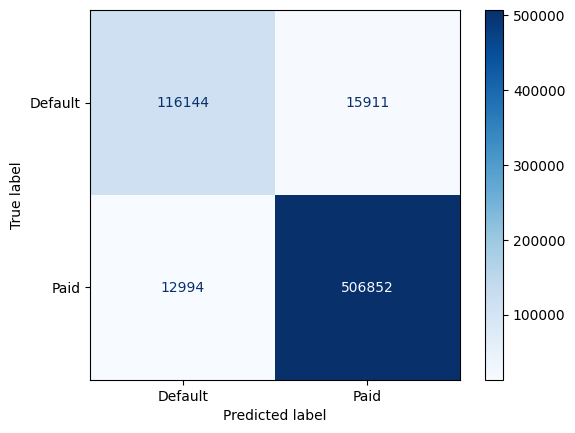

In [65]:
# Affichage avec un plot
graph_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Default", "Paid"])
graph_cm.plot(cmap="Blues")

In [3]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_predict

# Au lieu d'obtenir les prédictions, on récupere les scores de probabilités pour chaque observations
y_probas_cat = cross_val_predict(catboost_pipeline, X_train, y_train, method="predict_proba")
display(y_probas_cat)

# On récupere uniquement les probabilités pour la classe positive
y_scores_cat = y_probas_cat[:, 1]

# A partir des probabilités on calcule les combinaisons de scores pour recall et precision en fonction du seuil
precisions_cat, recalls_cat, thresholds_cat = precision_recall_curve(y_train, y_scores_cat)

Learning rate set to 0.149008
0:	learn: 0.5255308	total: 291ms	remaining: 4m 50s
1:	learn: 0.4266843	total: 502ms	remaining: 4m 10s
2:	learn: 0.3591964	total: 776ms	remaining: 4m 17s
3:	learn: 0.3200147	total: 1.04s	remaining: 4m 19s
4:	learn: 0.2879499	total: 1.29s	remaining: 4m 17s
5:	learn: 0.2706185	total: 1.6s	remaining: 4m 25s
6:	learn: 0.2554469	total: 1.85s	remaining: 4m 22s
7:	learn: 0.2452866	total: 2.17s	remaining: 4m 29s
8:	learn: 0.2355867	total: 2.48s	remaining: 4m 33s
9:	learn: 0.2296170	total: 2.76s	remaining: 4m 33s
10:	learn: 0.2202703	total: 3.02s	remaining: 4m 31s
11:	learn: 0.2132522	total: 3.31s	remaining: 4m 32s
12:	learn: 0.2084120	total: 3.54s	remaining: 4m 28s
13:	learn: 0.2050314	total: 3.8s	remaining: 4m 27s
14:	learn: 0.2024214	total: 4.01s	remaining: 4m 23s
15:	learn: 0.1987115	total: 4.32s	remaining: 4m 25s
16:	learn: 0.1969163	total: 4.63s	remaining: 4m 27s
17:	learn: 0.1937762	total: 4.96s	remaining: 4m 30s
18:	learn: 0.1920942	total: 5.3s	remaining: 4m

/home/melody/Documents/Projects/Classification-brief/brief_classif_sba/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.149008
0:	learn: 0.5226098	total: 127ms	remaining: 2m 6s
1:	learn: 0.4253277	total: 261ms	remaining: 2m 10s
2:	learn: 0.3583489	total: 480ms	remaining: 2m 39s
3:	learn: 0.3133580	total: 635ms	remaining: 2m 38s
4:	learn: 0.2917418	total: 786ms	remaining: 2m 36s
5:	learn: 0.2724626	total: 903ms	remaining: 2m 29s
6:	learn: 0.2524285	total: 1.03s	remaining: 2m 26s
7:	learn: 0.2419028	total: 1.15s	remaining: 2m 23s
8:	learn: 0.2313854	total: 1.28s	remaining: 2m 20s
9:	learn: 0.2243781	total: 1.48s	remaining: 2m 26s
10:	learn: 0.2186558	total: 1.68s	remaining: 2m 30s
11:	learn: 0.2141134	total: 1.86s	remaining: 2m 33s
12:	learn: 0.2100277	total: 2.07s	remaining: 2m 37s
13:	learn: 0.2072236	total: 2.34s	remaining: 2m 45s
14:	learn: 0.2031802	total: 2.56s	remaining: 2m 47s
15:	learn: 0.2000097	total: 2.78s	remaining: 2m 51s
16:	learn: 0.1962160	total: 3.08s	remaining: 2m 58s
17:	learn: 0.1927768	total: 3.32s	remaining: 3m 1s
18:	learn: 0.1908606	total: 3.6s	remaining: 3m

array([[0.99806331, 0.00193669],
       [0.99578068, 0.00421932],
       [0.98460837, 0.01539163],
       ...,
       [0.98592463, 0.01407537],
       [0.99464787, 0.00535213],
       [0.02397172, 0.97602828]])

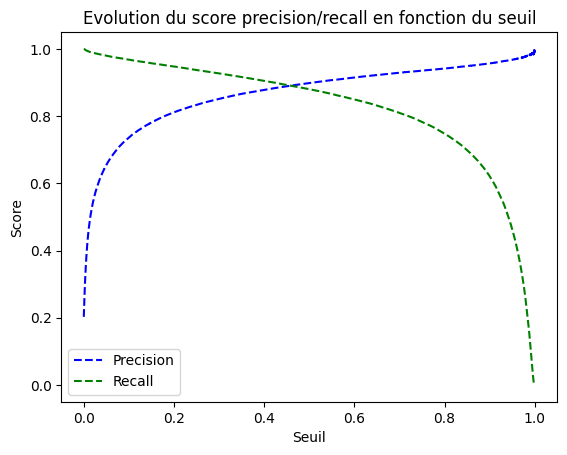

In [6]:
import matplotlib.pyplot as plt

plt.plot(thresholds_cat, precisions_cat[:-1], "b--", label="Precision")
plt.plot(thresholds_cat, recalls_cat[:-1], "g--", label="Recall")
plt.title("Evolution du score precision/recall en fonction du seuil")
plt.xlabel("Seuil")
plt.ylabel("Score")
plt.legend()
plt.show()

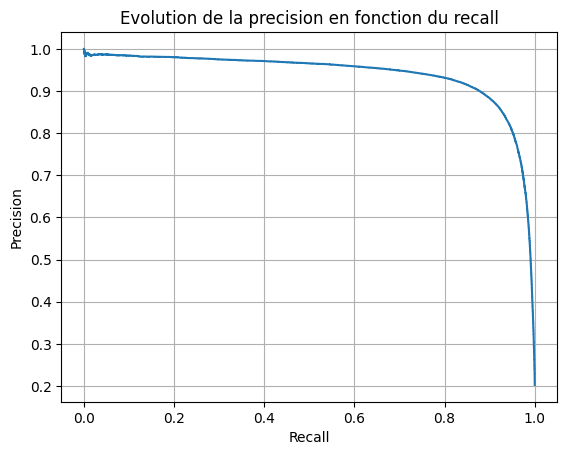

0.9404204839823904

In [7]:
from sklearn.metrics import average_precision_score

plt.plot(recalls_cat[:-1], precisions_cat[:-1])

plt.title("Evolution de la precision en fonction du recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

auc_pr = average_precision_score(y_train, y_scores_cat)
display(auc_pr)

In [13]:
from sklearn.metrics import roc_curve

# La fonction roc_curve retourne le FPR, TPR et les seuils 
fpr_cat, tpr_cat, tresholds_cat = roc_curve(y_train, y_scores_cat)

In [14]:
# Fonction pour représenter la courbe ROC
def plot_roc_curve(fpr, tpr, label=None):

    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.title("Courbe ROC")
    plt.xlabel("Taux de Faux Positif")
    plt.ylabel("Taux de Vrai Positif")
    plt.grid()

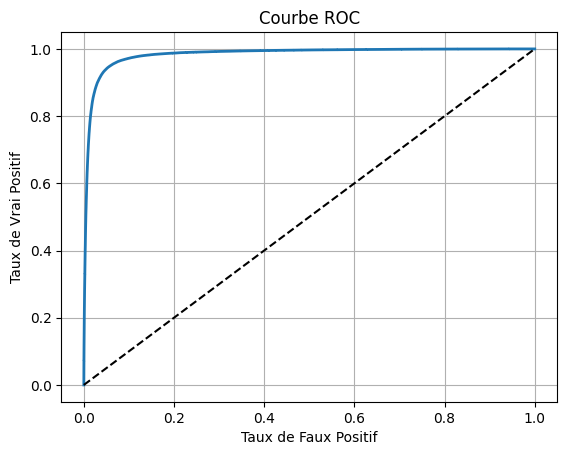

In [15]:
plot_roc_curve(fpr_cat, tpr_cat)
plt.show()

In [11]:
from sklearn.metrics import roc_auc_score

display(roc_auc_score(y_train, y_scores_cat))

0.9837724196910943

Learning rate set to 0.055745
0:	learn: 0.6320992	total: 38ms	remaining: 37.9s
1:	learn: 0.5791162	total: 77.3ms	remaining: 38.6s
2:	learn: 0.5303255	total: 118ms	remaining: 39.2s
3:	learn: 0.4881099	total: 153ms	remaining: 38.1s
4:	learn: 0.4546993	total: 189ms	remaining: 37.6s
5:	learn: 0.4233398	total: 226ms	remaining: 37.4s
6:	learn: 0.3985849	total: 268ms	remaining: 38s
7:	learn: 0.3787568	total: 309ms	remaining: 38.3s
8:	learn: 0.3604929	total: 349ms	remaining: 38.5s
9:	learn: 0.3470900	total: 387ms	remaining: 38.3s
10:	learn: 0.3302265	total: 426ms	remaining: 38.3s
11:	learn: 0.3187307	total: 465ms	remaining: 38.3s
12:	learn: 0.3085931	total: 509ms	remaining: 38.6s
13:	learn: 0.2995423	total: 554ms	remaining: 39.1s
14:	learn: 0.2920239	total: 599ms	remaining: 39.3s
15:	learn: 0.2860259	total: 633ms	remaining: 39s
16:	learn: 0.2790779	total: 678ms	remaining: 39.2s
17:	learn: 0.2727967	total: 718ms	remaining: 39.2s
18:	learn: 0.2686153	total: 757ms	remaining: 39.1s
19:	learn: 0.26

/home/utilisateur/Documents/Projets/Machine-learning/brief_classif_sba/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.074946
0:	learn: 0.6090115	total: 45ms	remaining: 45s
1:	learn: 0.5419187	total: 90.3ms	remaining: 45s
2:	learn: 0.4816506	total: 137ms	remaining: 45.6s
3:	learn: 0.4340003	total: 221ms	remaining: 54.9s
4:	learn: 0.4000713	total: 293ms	remaining: 58.3s
5:	learn: 0.3737324	total: 346ms	remaining: 57.3s
6:	learn: 0.3472824	total: 388ms	remaining: 55.1s
7:	learn: 0.3296000	total: 428ms	remaining: 53s
8:	learn: 0.3161001	total: 479ms	remaining: 52.8s
9:	learn: 0.2998661	total: 529ms	remaining: 52.4s
10:	learn: 0.2882071	total: 574ms	remaining: 51.6s
11:	learn: 0.2789673	total: 615ms	remaining: 50.6s
12:	learn: 0.2716309	total: 653ms	remaining: 49.6s
13:	learn: 0.2634780	total: 698ms	remaining: 49.2s
14:	learn: 0.2572930	total: 736ms	remaining: 48.3s
15:	learn: 0.2486875	total: 779ms	remaining: 47.9s
16:	learn: 0.2425501	total: 820ms	remaining: 47.4s
17:	learn: 0.2379272	total: 864ms	remaining: 47.1s
18:	learn: 0.2349375	total: 910ms	remaining: 47s
19:	learn: 0.230805

/home/utilisateur/Documents/Projets/Machine-learning/brief_classif_sba/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.074946
0:	learn: 0.6020808	total: 43.3ms	remaining: 43.2s
1:	learn: 0.5370740	total: 83.8ms	remaining: 41.8s
2:	learn: 0.4827275	total: 126ms	remaining: 41.9s
3:	learn: 0.4387895	total: 172ms	remaining: 42.9s
4:	learn: 0.4052561	total: 314ms	remaining: 1m 2s
5:	learn: 0.3791952	total: 373ms	remaining: 1m 1s
6:	learn: 0.3531046	total: 418ms	remaining: 59.3s
7:	learn: 0.3347503	total: 458ms	remaining: 56.8s
8:	learn: 0.3196486	total: 500ms	remaining: 55.1s
9:	learn: 0.3048587	total: 547ms	remaining: 54.1s
10:	learn: 0.2922210	total: 592ms	remaining: 53.2s
11:	learn: 0.2823727	total: 635ms	remaining: 52.3s
12:	learn: 0.2753805	total: 669ms	remaining: 50.8s
13:	learn: 0.2675612	total: 708ms	remaining: 49.9s
14:	learn: 0.2614142	total: 744ms	remaining: 48.8s
15:	learn: 0.2558969	total: 789ms	remaining: 48.5s
16:	learn: 0.2511421	total: 834ms	remaining: 48.2s
17:	learn: 0.2463549	total: 875ms	remaining: 47.7s
18:	learn: 0.2403659	total: 916ms	remaining: 47.3s
19:	learn

/home/utilisateur/Documents/Projets/Machine-learning/brief_classif_sba/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.089113
0:	learn: 0.5944439	total: 49.8ms	remaining: 49.8s
1:	learn: 0.5175493	total: 98.9ms	remaining: 49.3s
2:	learn: 0.4599941	total: 147ms	remaining: 48.7s
3:	learn: 0.4157401	total: 193ms	remaining: 48.1s
4:	learn: 0.3781801	total: 249ms	remaining: 49.6s
5:	learn: 0.3488857	total: 299ms	remaining: 49.6s
6:	learn: 0.3263628	total: 346ms	remaining: 49.1s
7:	learn: 0.3111102	total: 394ms	remaining: 48.9s
8:	learn: 0.2949576	total: 449ms	remaining: 49.4s
9:	learn: 0.2853382	total: 503ms	remaining: 49.8s
10:	learn: 0.2753671	total: 546ms	remaining: 49.1s
11:	learn: 0.2670042	total: 588ms	remaining: 48.5s
12:	learn: 0.2612172	total: 634ms	remaining: 48.1s
13:	learn: 0.2498327	total: 687ms	remaining: 48.4s
14:	learn: 0.2426778	total: 737ms	remaining: 48.4s
15:	learn: 0.2378941	total: 787ms	remaining: 48.4s
16:	learn: 0.2309374	total: 836ms	remaining: 48.3s
17:	learn: 0.2267877	total: 890ms	remaining: 48.6s
18:	learn: 0.2231784	total: 940ms	remaining: 48.5s
19:	learn

/home/utilisateur/Documents/Projets/Machine-learning/brief_classif_sba/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.074946
0:	learn: 0.6020808	total: 47.4ms	remaining: 47.4s
1:	learn: 0.5370740	total: 91.3ms	remaining: 45.5s
2:	learn: 0.4827275	total: 164ms	remaining: 54.4s
3:	learn: 0.4387895	total: 276ms	remaining: 1m 8s
4:	learn: 0.4052561	total: 339ms	remaining: 1m 7s
5:	learn: 0.3791952	total: 382ms	remaining: 1m 3s
6:	learn: 0.3531046	total: 426ms	remaining: 1m
7:	learn: 0.3347503	total: 470ms	remaining: 58.3s
8:	learn: 0.3196486	total: 515ms	remaining: 56.7s
9:	learn: 0.3048587	total: 557ms	remaining: 55.2s
10:	learn: 0.2922210	total: 604ms	remaining: 54.3s
11:	learn: 0.2823727	total: 645ms	remaining: 53.1s
12:	learn: 0.2753805	total: 682ms	remaining: 51.8s
13:	learn: 0.2675612	total: 724ms	remaining: 51s
14:	learn: 0.2614142	total: 763ms	remaining: 50.1s
15:	learn: 0.2558969	total: 806ms	remaining: 49.6s
16:	learn: 0.2511421	total: 847ms	remaining: 49s
17:	learn: 0.2463549	total: 888ms	remaining: 48.5s
18:	learn: 0.2403659	total: 929ms	remaining: 48s
19:	learn: 0.23447

/home/utilisateur/Documents/Projets/Machine-learning/brief_classif_sba/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.089113
0:	learn: 0.5856686	total: 48.1ms	remaining: 48s
1:	learn: 0.5177775	total: 96.3ms	remaining: 48.1s
2:	learn: 0.4541518	total: 150ms	remaining: 50s
3:	learn: 0.4087253	total: 206ms	remaining: 51.4s
4:	learn: 0.3754673	total: 264ms	remaining: 52.6s
5:	learn: 0.3481231	total: 320ms	remaining: 52.9s
6:	learn: 0.3284826	total: 379ms	remaining: 53.8s
7:	learn: 0.3126679	total: 435ms	remaining: 53.9s
8:	learn: 0.2966827	total: 489ms	remaining: 53.9s
9:	learn: 0.2842566	total: 538ms	remaining: 53.3s
10:	learn: 0.2748984	total: 591ms	remaining: 53.1s
11:	learn: 0.2678775	total: 640ms	remaining: 52.7s
12:	learn: 0.2612463	total: 692ms	remaining: 52.5s
13:	learn: 0.2549066	total: 736ms	remaining: 51.8s
14:	learn: 0.2457700	total: 783ms	remaining: 51.4s
15:	learn: 0.2408829	total: 830ms	remaining: 51s
16:	learn: 0.2332300	total: 883ms	remaining: 51s
17:	learn: 0.2287800	total: 933ms	remaining: 50.9s
18:	learn: 0.2257030	total: 988ms	remaining: 51s
19:	learn: 0.222880

/home/utilisateur/Documents/Projets/Machine-learning/brief_classif_sba/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.10076
0:	learn: 0.5770989	total: 57.4ms	remaining: 57.3s
1:	learn: 0.4962552	total: 112ms	remaining: 56s
2:	learn: 0.4288341	total: 170ms	remaining: 56.6s
3:	learn: 0.3840232	total: 235ms	remaining: 58.5s
4:	learn: 0.3506513	total: 288ms	remaining: 57.4s
5:	learn: 0.3255886	total: 343ms	remaining: 56.9s
6:	learn: 0.3053575	total: 404ms	remaining: 57.3s
7:	learn: 0.2860922	total: 463ms	remaining: 57.4s
8:	learn: 0.2746623	total: 513ms	remaining: 56.5s
9:	learn: 0.2633397	total: 571ms	remaining: 56.5s
10:	learn: 0.2541896	total: 636ms	remaining: 57.2s
11:	learn: 0.2475079	total: 700ms	remaining: 57.6s
12:	learn: 0.2414653	total: 756ms	remaining: 57.4s
13:	learn: 0.2365441	total: 810ms	remaining: 57.1s
14:	learn: 0.2297074	total: 873ms	remaining: 57.3s
15:	learn: 0.2264698	total: 933ms	remaining: 57.3s
16:	learn: 0.2207777	total: 990ms	remaining: 57.2s
17:	learn: 0.2154426	total: 1.05s	remaining: 57.2s
18:	learn: 0.2126611	total: 1.11s	remaining: 57.2s
19:	learn: 0.

/home/utilisateur/Documents/Projets/Machine-learning/brief_classif_sba/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.110833
0:	learn: 0.5688583	total: 61.4ms	remaining: 1m 1s
1:	learn: 0.4731475	total: 127ms	remaining: 1m 3s
2:	learn: 0.4121746	total: 191ms	remaining: 1m 3s
3:	learn: 0.3666464	total: 265ms	remaining: 1m 5s
4:	learn: 0.3354539	total: 325ms	remaining: 1m 4s
5:	learn: 0.3067891	total: 386ms	remaining: 1m 3s
6:	learn: 0.2899743	total: 455ms	remaining: 1m 4s
7:	learn: 0.2764049	total: 523ms	remaining: 1m 4s
8:	learn: 0.2672688	total: 592ms	remaining: 1m 5s
9:	learn: 0.2578233	total: 653ms	remaining: 1m 4s
10:	learn: 0.2509180	total: 719ms	remaining: 1m 4s
11:	learn: 0.2389456	total: 783ms	remaining: 1m 4s
12:	learn: 0.2321293	total: 844ms	remaining: 1m 4s
13:	learn: 0.2253774	total: 911ms	remaining: 1m 4s
14:	learn: 0.2209189	total: 976ms	remaining: 1m 4s
15:	learn: 0.2173472	total: 1.04s	remaining: 1m 3s
16:	learn: 0.2127991	total: 1.1s	remaining: 1m 3s
17:	learn: 0.2099550	total: 1.15s	remaining: 1m 2s
18:	learn: 0.2075442	total: 1.22s	remaining: 1m 2s
19:	learn: 

/home/utilisateur/Documents/Projets/Machine-learning/brief_classif_sba/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.119806
0:	learn: 0.5495773	total: 76.9ms	remaining: 1m 16s
1:	learn: 0.4565906	total: 157ms	remaining: 1m 18s
2:	learn: 0.3981132	total: 239ms	remaining: 1m 19s
3:	learn: 0.3577184	total: 310ms	remaining: 1m 17s
4:	learn: 0.3275256	total: 372ms	remaining: 1m 14s
5:	learn: 0.3042337	total: 448ms	remaining: 1m 14s
6:	learn: 0.2866065	total: 527ms	remaining: 1m 14s
7:	learn: 0.2747810	total: 599ms	remaining: 1m 14s
8:	learn: 0.2657803	total: 669ms	remaining: 1m 13s
9:	learn: 0.2489896	total: 740ms	remaining: 1m 13s
10:	learn: 0.2429294	total: 808ms	remaining: 1m 12s
11:	learn: 0.2348466	total: 881ms	remaining: 1m 12s
12:	learn: 0.2281225	total: 952ms	remaining: 1m 12s
13:	learn: 0.2243111	total: 1.02s	remaining: 1m 11s
14:	learn: 0.2197108	total: 1.1s	remaining: 1m 12s
15:	learn: 0.2143271	total: 1.18s	remaining: 1m 12s
16:	learn: 0.2112167	total: 1.25s	remaining: 1m 12s
17:	learn: 0.2068906	total: 1.32s	remaining: 1m 12s
18:	learn: 0.2034465	total: 1.4s	remaining: 

/home/utilisateur/Documents/Projets/Machine-learning/brief_classif_sba/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.127957
0:	learn: 0.5455282	total: 83.1ms	remaining: 1m 23s
1:	learn: 0.4529426	total: 159ms	remaining: 1m 19s
2:	learn: 0.3891006	total: 249ms	remaining: 1m 22s
3:	learn: 0.3424962	total: 335ms	remaining: 1m 23s
4:	learn: 0.3135821	total: 418ms	remaining: 1m 23s
5:	learn: 0.2914938	total: 497ms	remaining: 1m 22s
6:	learn: 0.2761795	total: 585ms	remaining: 1m 22s
7:	learn: 0.2592288	total: 670ms	remaining: 1m 23s
8:	learn: 0.2500545	total: 774ms	remaining: 1m 25s
9:	learn: 0.2364316	total: 969ms	remaining: 1m 35s
10:	learn: 0.2298435	total: 1.09s	remaining: 1m 37s
11:	learn: 0.2224694	total: 1.16s	remaining: 1m 35s
12:	learn: 0.2165628	total: 1.25s	remaining: 1m 34s
13:	learn: 0.2127725	total: 1.32s	remaining: 1m 33s
14:	learn: 0.2093895	total: 1.39s	remaining: 1m 31s
15:	learn: 0.2065032	total: 1.47s	remaining: 1m 30s
16:	learn: 0.2035123	total: 1.55s	remaining: 1m 29s
17:	learn: 0.2009041	total: 1.62s	remaining: 1m 28s
18:	learn: 0.1988758	total: 1.73s	remaining

/home/utilisateur/Documents/Projets/Machine-learning/brief_classif_sba/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.135465
0:	learn: 0.5395547	total: 86.5ms	remaining: 1m 26s
1:	learn: 0.4478876	total: 170ms	remaining: 1m 24s
2:	learn: 0.3867893	total: 262ms	remaining: 1m 27s
3:	learn: 0.3378750	total: 346ms	remaining: 1m 26s
4:	learn: 0.3116765	total: 431ms	remaining: 1m 25s
5:	learn: 0.2911101	total: 520ms	remaining: 1m 26s
6:	learn: 0.2679827	total: 609ms	remaining: 1m 26s
7:	learn: 0.2579059	total: 700ms	remaining: 1m 26s
8:	learn: 0.2478926	total: 785ms	remaining: 1m 26s
9:	learn: 0.2409182	total: 861ms	remaining: 1m 25s
10:	learn: 0.2333919	total: 945ms	remaining: 1m 24s
11:	learn: 0.2258033	total: 1.03s	remaining: 1m 24s
12:	learn: 0.2178801	total: 1.12s	remaining: 1m 25s
13:	learn: 0.2138917	total: 1.21s	remaining: 1m 25s
14:	learn: 0.2092777	total: 1.29s	remaining: 1m 24s
15:	learn: 0.2065427	total: 1.36s	remaining: 1m 23s
16:	learn: 0.2044264	total: 1.44s	remaining: 1m 23s
17:	learn: 0.2018150	total: 1.53s	remaining: 1m 23s
18:	learn: 0.1993722	total: 1.62s	remaining

/home/utilisateur/Documents/Projets/Machine-learning/brief_classif_sba/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.142453
0:	learn: 0.5318467	total: 91.1ms	remaining: 1m 30s
1:	learn: 0.4351012	total: 185ms	remaining: 1m 32s
2:	learn: 0.3672615	total: 284ms	remaining: 1m 34s
3:	learn: 0.3266872	total: 378ms	remaining: 1m 34s
4:	learn: 0.2955286	total: 478ms	remaining: 1m 35s
5:	learn: 0.2775403	total: 574ms	remaining: 1m 35s
6:	learn: 0.2626862	total: 653ms	remaining: 1m 32s
7:	learn: 0.2527536	total: 744ms	remaining: 1m 32s
8:	learn: 0.2454072	total: 836ms	remaining: 1m 32s
9:	learn: 0.2314272	total: 938ms	remaining: 1m 32s
10:	learn: 0.2255741	total: 1.03s	remaining: 1m 33s
11:	learn: 0.2168558	total: 1.13s	remaining: 1m 33s
12:	learn: 0.2123183	total: 1.21s	remaining: 1m 32s
13:	learn: 0.2091749	total: 1.3s	remaining: 1m 31s
14:	learn: 0.2058592	total: 1.4s	remaining: 1m 31s
15:	learn: 0.2007679	total: 1.49s	remaining: 1m 31s
16:	learn: 0.1985236	total: 1.6s	remaining: 1m 32s
17:	learn: 0.1966172	total: 1.69s	remaining: 1m 32s
18:	learn: 0.1949972	total: 1.79s	remaining: 1

/home/utilisateur/Documents/Projets/Machine-learning/brief_classif_sba/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.149008
0:	learn: 0.5262203	total: 102ms	remaining: 1m 42s
1:	learn: 0.4242100	total: 208ms	remaining: 1m 43s
2:	learn: 0.3604090	total: 315ms	remaining: 1m 44s
3:	learn: 0.3160608	total: 417ms	remaining: 1m 43s
4:	learn: 0.2927916	total: 542ms	remaining: 1m 47s
5:	learn: 0.2756450	total: 650ms	remaining: 1m 47s
6:	learn: 0.2554976	total: 757ms	remaining: 1m 47s
7:	learn: 0.2438904	total: 847ms	remaining: 1m 45s
8:	learn: 0.2348606	total: 941ms	remaining: 1m 43s
9:	learn: 0.2260983	total: 1.04s	remaining: 1m 42s
10:	learn: 0.2209809	total: 1.14s	remaining: 1m 42s
11:	learn: 0.2138408	total: 1.24s	remaining: 1m 42s
12:	learn: 0.2086302	total: 1.34s	remaining: 1m 41s
13:	learn: 0.2051173	total: 1.43s	remaining: 1m 40s
14:	learn: 0.2023289	total: 1.53s	remaining: 1m 40s
15:	learn: 0.1982054	total: 1.63s	remaining: 1m 40s
16:	learn: 0.1950385	total: 1.73s	remaining: 1m 39s
17:	learn: 0.1923153	total: 1.82s	remaining: 1m 39s
18:	learn: 0.1899010	total: 1.93s	remaining:

/home/utilisateur/Documents/Projets/Machine-learning/brief_classif_sba/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.055745
0:	learn: 0.6333093	total: 33.2ms	remaining: 33.2s
1:	learn: 0.5820604	total: 63.4ms	remaining: 31.6s
2:	learn: 0.5352924	total: 97.2ms	remaining: 32.3s
3:	learn: 0.4942359	total: 131ms	remaining: 32.5s
4:	learn: 0.4603641	total: 163ms	remaining: 32.4s
5:	learn: 0.4321036	total: 196ms	remaining: 32.4s
6:	learn: 0.4040374	total: 235ms	remaining: 33.4s
7:	learn: 0.3814899	total: 274ms	remaining: 34s
8:	learn: 0.3671668	total: 311ms	remaining: 34.2s
9:	learn: 0.3506569	total: 345ms	remaining: 34.2s
10:	learn: 0.3369070	total: 379ms	remaining: 34.1s
11:	learn: 0.3253355	total: 408ms	remaining: 33.6s
12:	learn: 0.3157046	total: 444ms	remaining: 33.7s
13:	learn: 0.3079023	total: 480ms	remaining: 33.8s
14:	learn: 0.2992295	total: 517ms	remaining: 34s
15:	learn: 0.2920693	total: 549ms	remaining: 33.8s
16:	learn: 0.2854566	total: 584ms	remaining: 33.8s
17:	learn: 0.2799396	total: 620ms	remaining: 33.8s
18:	learn: 0.2734775	total: 659ms	remaining: 34s
19:	learn: 0.2

/home/utilisateur/Documents/Projets/Machine-learning/brief_classif_sba/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.074946
0:	learn: 0.6020808	total: 40.5ms	remaining: 40.5s
1:	learn: 0.5370740	total: 82.9ms	remaining: 41.4s
2:	learn: 0.4827275	total: 122ms	remaining: 40.4s
3:	learn: 0.4387895	total: 171ms	remaining: 42.5s
4:	learn: 0.4052561	total: 221ms	remaining: 44s
5:	learn: 0.3791952	total: 304ms	remaining: 50.4s
6:	learn: 0.3531046	total: 392ms	remaining: 55.6s
7:	learn: 0.3347503	total: 455ms	remaining: 56.4s
8:	learn: 0.3196486	total: 505ms	remaining: 55.6s
9:	learn: 0.3048587	total: 547ms	remaining: 54.1s
10:	learn: 0.2922210	total: 589ms	remaining: 52.9s
11:	learn: 0.2823727	total: 632ms	remaining: 52s
12:	learn: 0.2753805	total: 667ms	remaining: 50.7s
13:	learn: 0.2675612	total: 714ms	remaining: 50.3s
14:	learn: 0.2614142	total: 750ms	remaining: 49.3s
15:	learn: 0.2558969	total: 789ms	remaining: 48.5s
16:	learn: 0.2511421	total: 829ms	remaining: 47.9s
17:	learn: 0.2463549	total: 869ms	remaining: 47.4s
18:	learn: 0.2403659	total: 915ms	remaining: 47.2s
19:	learn: 0.

/home/utilisateur/Documents/Projets/Machine-learning/brief_classif_sba/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.089113
0:	learn: 0.5856686	total: 52.5ms	remaining: 52.5s
1:	learn: 0.5177775	total: 101ms	remaining: 50.5s
2:	learn: 0.4541518	total: 152ms	remaining: 50.7s
3:	learn: 0.4087253	total: 203ms	remaining: 50.6s
4:	learn: 0.3754673	total: 261ms	remaining: 52s
5:	learn: 0.3481231	total: 314ms	remaining: 52s
6:	learn: 0.3284826	total: 362ms	remaining: 51.3s
7:	learn: 0.3126679	total: 407ms	remaining: 50.4s
8:	learn: 0.2966827	total: 463ms	remaining: 50.9s
9:	learn: 0.2842566	total: 509ms	remaining: 50.4s
10:	learn: 0.2748984	total: 560ms	remaining: 50.3s
11:	learn: 0.2678775	total: 607ms	remaining: 50s
12:	learn: 0.2612463	total: 661ms	remaining: 50.2s
13:	learn: 0.2549066	total: 706ms	remaining: 49.7s
14:	learn: 0.2457700	total: 756ms	remaining: 49.6s
15:	learn: 0.2408829	total: 805ms	remaining: 49.5s
16:	learn: 0.2332300	total: 861ms	remaining: 49.8s
17:	learn: 0.2287800	total: 911ms	remaining: 49.7s
18:	learn: 0.2257030	total: 957ms	remaining: 49.4s
19:	learn: 0.222

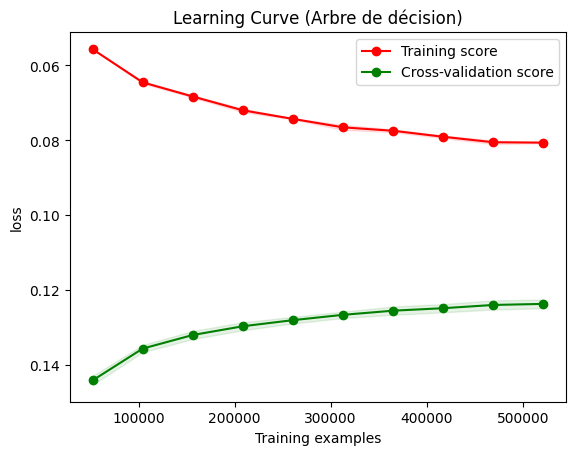

In [12]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = catboost_pipeline,
    X = X_train,
    y = y_train,
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv = 5,
    scoring = 'neg_log_loss'
)

#recuperation des moyennes et des écarts types(facultatif) à chaque cv
train_scores_mean = -train_scores.mean(axis = 1)
train_scores_std = train_scores.std(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
validation_scores_std = validation_scores.std(axis = 1)


plt.figure()
plt.title("Learning Curve (Arbre de décision)")
plt.xlabel("Training examples")
plt.ylabel("loss")
plt.gca().invert_yaxis() #inverser y car métrique de perte

# afficher les points
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

# relier les points
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")


plt.legend()
plt.show()

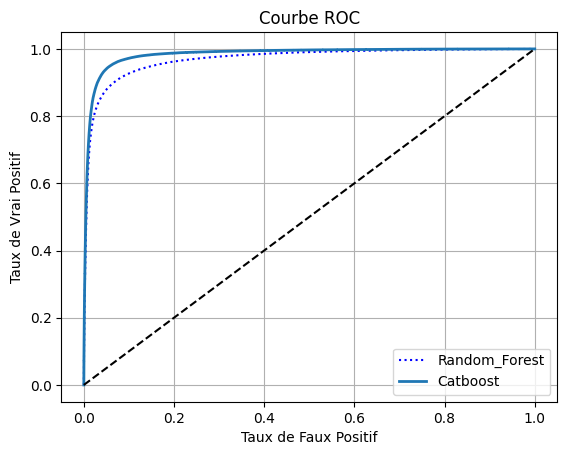

AUC modèle CatBoost 0.9837052441317594
AUC modèle Random Forest 0.9692973051812314


In [17]:
# On récupere les scores pour le modèle random forest
# y_probas_rf = cross_val_predict(rf_pipeline, X_train, y_train, method="predict_proba")
# y_scores_rf = y_probas_rf[:, 1]
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# On calcule le TPR et FPR pour le modèle random forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_scores_rf)

# On représente graphiquement les deux modèles
plt.plot(fpr_rf, tpr_rf, "b:", label="Random_Forest")
plot_roc_curve(fpr_cat, tpr_cat, "Catboost")
plt.legend(loc="lower right")
plt.show()

print("AUC modèle CatBoost", roc_auc_score(y_train, y_scores_cat))
print("AUC modèle Random Forest", roc_auc_score(y_train, y_scores_rf))


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


# Charger le jeu de données

df = pd.read_csv('dataset_test2.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']

# Encoder la variable cible
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identifier les variables catégorielles et numériques
cat_vars = X.select_dtypes(include=['object']).columns.tolist() + ['NewExist'] + ['UrbanRural'] + ['FranchiseBinary'] 
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars.remove('NewExist')  
num_vars.remove('UrbanRural') 
num_vars.remove('FranchiseBinary') 

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    ('classifier', GaussianNB())
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, shuffle=True, test_size=0.05, random_state=42, stratify=y_encoded)

rf_pipeline.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = rf_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(report)

              precision    recall  f1-score   support

      CHGOFF       0.25      0.88      0.38      6950
       P I F       0.91      0.31      0.47     27361

    accuracy                           0.43     34311
   macro avg       0.58      0.60      0.43     34311
weighted avg       0.78      0.43      0.45     34311



In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


# Charger le jeu de données

df = pd.read_csv('dataset_test2.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']

# Encoder la variable cible
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identifier les variables catégorielles et numériques
cat_vars = X.select_dtypes(include=['object']).columns.tolist() + ['NewExist'] + ['UrbanRural'] + ['FranchiseBinary'] 
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars.remove('NewExist')  
num_vars.remove('UrbanRural') 
num_vars.remove('FranchiseBinary') 
# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    ('classifier', BernoulliNB())
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, shuffle=True, test_size=0.05, random_state=42, stratify=y_encoded)

rf_pipeline.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = rf_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(report)

              precision    recall  f1-score   support

      CHGOFF       0.37      0.62      0.46      6950
       P I F       0.88      0.73      0.80     27361

    accuracy                           0.71     34311
   macro avg       0.63      0.67      0.63     34311
weighted avg       0.78      0.71      0.73     34311



In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


# Charger le jeu de données

df = pd.read_csv('dataset_test2.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']

# Encoder la variable cible
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identifier les variables catégorielles et numériques
cat_vars = X.select_dtypes(include=['object']).columns.tolist() + ['NewExist'] + ['UrbanRural'] + ['FranchiseBinary'] 
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars.remove('NewExist')  
num_vars.remove('UrbanRural') 
num_vars.remove('FranchiseBinary') 

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    ('classifier', LogisticRegression(random_state=42))
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, shuffle=True, test_size=0.05, random_state=42, stratify=y_encoded)

rf_pipeline.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = rf_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(report)

              precision    recall  f1-score   support

      CHGOFF       0.73      0.42      0.53      6950
       P I F       0.87      0.96      0.91     27361

    accuracy                           0.85     34311
   macro avg       0.80      0.69      0.72     34311
weighted avg       0.84      0.85      0.83     34311

